## Load data

In [1]:
# Week 2 homework, Cifar10 dataset classifier.
# Loading Cifar10 dataset
from keras.datasets import cifar10
#the convolutional neural network
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from keras.layers import Conv2D   #the connection is a convolution on 2D image
from keras.layers import MaxPooling2D  #maxpooling is taking subsamples with 
from keras.layers import Flatten, Dropout       #no change except dimensions
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from google.colab import drive
from keras.callbacks import LearningRateScheduler

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [2]:
def load_google_drive():
  drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dnn-models/cifar10/model6/'

load_google_drive()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
!mkdir -p "/content/gdrive/My Drive/dnn-models/cifar10/model6/"

In [0]:
print('x_train shape:', x_train.shape)   
print('y_train shape:', y_train.shape)  
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
#Inspect 1 data point, the first image
image1=x_train[0]
label1=y_train[0]
#print (image1)
#print ('data label=', label1)  #show data label

def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

    # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

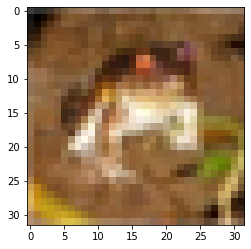

In [0]:
from matplotlib import pyplot

#imshow does image display, image 1 is 32x32x3 3-d array (tensor)
pyplot.imshow(image1);

In [0]:
#review pixel values at different points
print (image1[0][0])  #darker means smaller value
print (image1[15][15])
#show red color, the first element is the largest
print (image1[7][16])
#show gree color, the second element is the largest
print (image1[23][27])

[59 62 63]
[247 234 212]
[181 102  69]
[118 141  20]


In [0]:
# Normalize the number to be between 0 and 1 (the max is 255)

#convert the data type to floating number
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train / 255
x_test = x_test / 255

In [0]:
# convert class vectors to 1-hot representation
num_classes = 10

from keras.utils import to_categorical
print (y_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print (y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
def my_save_model(model, json_file, h5_file):
  #save to disk
  model_json = model.to_json()
  with open(json_file, 'w') as json_file:
    json_file.write(model_json)
  model.save_weights(h5_file) 

In [0]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train)


In [0]:
input_shape = (32, 32, 3)
def basic_model():
  model2 = Sequential()
  model2.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu',
                 input_shape=input_shape, padding='same'))   #padding='same' means the same as kernel size
  model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
  #model2.add(BatchNormalization())
  model2.add(Dropout(0.4))
  model2.add(Conv2D(128, (5, 5), activation='relu',padding='same'))  #default strides=(1,1)
  model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model2.add(BatchNormalization())
  model2.add(Dropout(0.4))
  model2.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
  model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model2.add(BatchNormalization())
  model2.add(Dropout(0.4))
  model2.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
  model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  #model2.add(BatchNormalization())
  model2.add(Dropout(0.4))
  model2.add(Flatten())  
  #model2.add(Dropout(0.4))
  #model2.add(Dense(256, activation='relu')) #1000 is the number of nodes on this layer
  model2.add(Dense(num_classes, activation='softmax'))  #Output layer
  model2.summary()
  model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model2

In [0]:

# checkpoint

old_run = "_run_one"
current_run = "_run_2"

filepath=base_dir+"weights.best.hdf5"

reuse_model = True

if reuse_model == True:
  model_final = load_model(filepath)
  new_filepath = filepath + current_run
else:
  model_final = basic_model()
  new_filepath = filepath

def lr_schedule_base(epoch):
    lrate = 0.001
    if epoch > 30:
        lrate = 0.0005
    if epoch > 80:
        lrate = 0.0003
    return lrate

def lr_schedule_one(epoch):
    lrate = 0.0005
    if epoch > 50:
        lrate = 0.0003
    if epoch > 75:
        lrate = 0.0001
    return lrate

checkpoint = ModelCheckpoint(new_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(lr_schedule_base)]







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
epochs=100

#history = model2.fit(x_train, y_train, epochs=epochs, batch_size=128, callbacks=callbacks_list, verbose=1, 
#                            validation_data=(x_test, y_test))  #verbose=1 shows progress bar,

# fits the model on batches with real-time data augmentation:
model_final.fit_generator(datagen.flow(x_train, y_train, batch_size=128), callbacks=callbacks_list,
                    steps_per_epoch=len(x_train) / 128, epochs=epochs, validation_data=(x_test, y_test))



Epoch 1/100
391/390 [==============================] - 50s 128ms/step - loss: 0.7312 - acc: 0.7466 - val_loss: 0.7020 - val_acc: 0.7612

Epoch 00001: val_acc improved from -inf to 0.76120, saving model to /content/gdrive/My Drive/dnn-models/cifar10/model6/weights.best.hdf5_run_2
Epoch 2/100
391/390 [==============================] - 45s 115ms/step - loss: 0.7333 - acc: 0.7487 - val_loss: 0.7252 - val_acc: 0.7524

Epoch 00002: val_acc did not improve from 0.76120
Epoch 3/100
391/390 [==============================] - 45s 115ms/step - loss: 0.7249 - acc: 0.7501 - val_loss: 0.7355 - val_acc: 0.7456

Epoch 00003: val_acc did not improve from 0.76120
Epoch 4/100
391/390 [==============================] - 45s 115ms/step - loss: 0.7286 - acc: 0.7490 - val_loss: 0.6377 - val_acc: 0.7834

Epoch 00004: val_acc improved from 0.76120 to 0.78340, saving model to /content/gdrive/My Drive/dnn-models/cifar10/model6/weights.best.hdf5_run_2
Epoch 5/100
391/390 [==============================] - 45s 115m

In [0]:
my_save_model(model_final, base_dir+'my_cifar10_model_6.json', 'my_cifar10_model6.h5')

In [0]:
model3 = load_model('/content/gdrive/My Drive/dnn-models/cifar10/model6/weights.best.hdf5_run_2')
#plot_history(history)

#testing
from sklearn.metrics import classification_report
scores = model3.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))
print(scores)

y_predict = model3.predict(x_test)
# print(Y_predict)
# print(classification_report(y_test, y_predict))

model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 255us/step

Test result: 83.430 loss: 0.494
[0.49362211284637453, 0.8343]
10000/10000 [==============================] - 4s 357us/step


[0.4936221161365509, 0.8343]

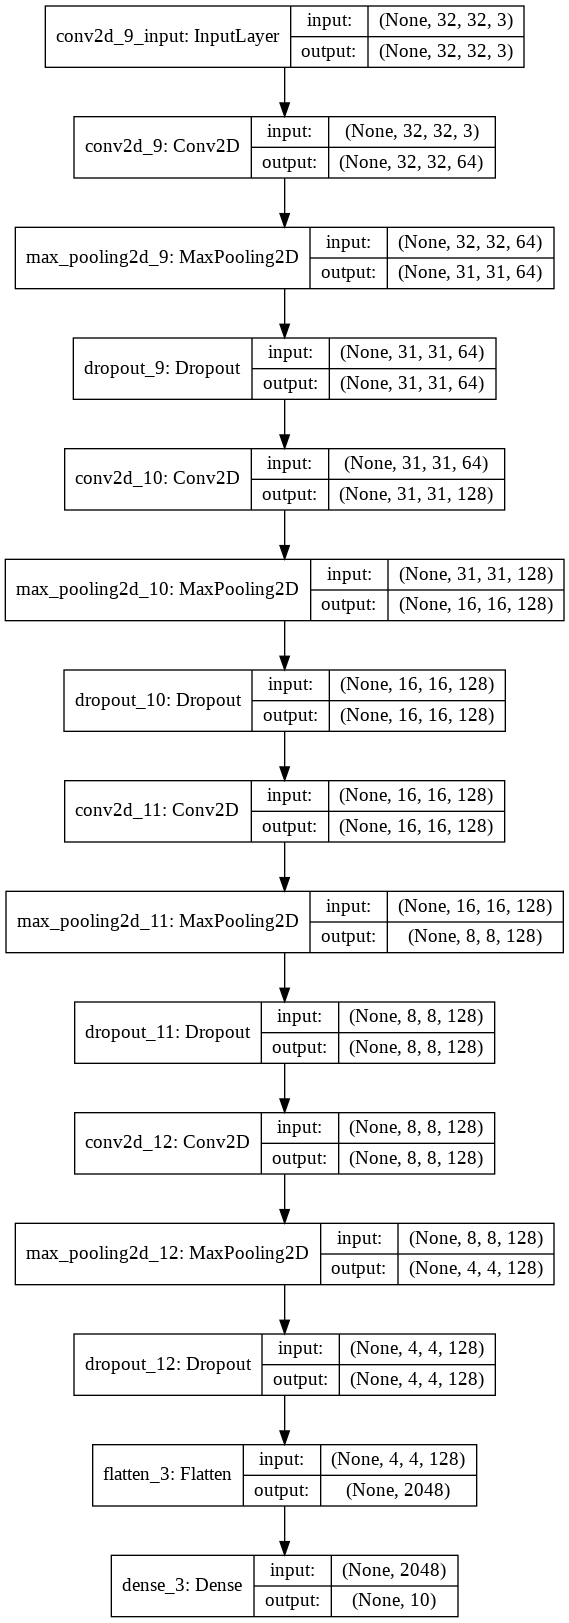

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# Round TWO
def lr_schedule_one(epoch):
    lrate = 0.0002
    if epoch > 25:
        lrate = 0.0001
    if epoch > 50:
        lrate = 0.00004
    return lrate

new_filepath = filepath + "_run_two_part_2"
checkpoint = ModelCheckpoint(new_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(lr_schedule_one)]

epochs=100

#history = model2.fit(x_train, y_train, epochs=epochs, batch_size=128, callbacks=callbacks_list, verbose=1, 
#                            validation_data=(x_test, y_test))  #verbose=1 shows progress bar,

# fits the model on batches with real-time data augmentation:
model3.fit_generator(datagen.flow(x_train, y_train, batch_size=128), callbacks=callbacks_list,
                    steps_per_epoch=len(x_train) / 128, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/100
391/390 [==============================] - 46s 118ms/step - loss: 0.5046 - acc: 0.8250 - val_loss: 0.5367 - val_acc: 0.8207

Epoch 00001: val_acc improved from -inf to 0.82070, saving model to /content/gdrive/My Drive/dnn-models/cifar10/model6/weights.best.hdf5_run_two_part_2
Epoch 2/100
391/390 [==============================] - 45s 116ms/step - loss: 0.4991 - acc: 0.8284 - val_loss: 0.5461 - val_acc: 0.8192

Epoch 00002: val_acc did not improve from 0.82070
Epoch 3/100
391/390 [==============================] - 45s 116ms/step - loss: 0.5019 - acc: 0.8240 - val_loss: 0.5486 - val_acc: 0.8199

Epoch 00003: val_acc did not improve from 0.82070
Epoch 4/100
391/390 [==============================] - 45s 116ms/step - loss: 0.5006 - acc: 0.8248 - val_loss: 0.5397 - val_acc: 0.8216

Epoch 00004: val_acc improved from 0.82070 to 0.82160, saving model to /content/gdrive/My Drive/dnn-models/cifar10/model6/weights.best.hdf5_run_two_part_2
Epoch 5/100
391/390 [========================